1. Exploratory Data Analysis (EDA)

Import Library dan Load Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

data = pd.read_csv('ObesityDataSet.csv')  
print(data.head())


  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

Info Dataset

In [13]:
# Info struktur data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Deskripsi Statistik Data Numerik

In [3]:
data.describe()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Cek Missing Value

In [4]:
data.isnull().sum()


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Cek Data Duplikat

In [5]:
data.duplicated().sum()


np.int64(18)

Cek Unique Value Setiap Kolom

In [6]:
for col in data.columns:
    print(f'{col}: {data[col].nunique()} unique values')


Age: 1394 unique values
Gender: 3 unique values
Height: 1562 unique values
Weight: 1518 unique values
CALC: 5 unique values
FAVC: 3 unique values
FCVC: 808 unique values
NCP: 637 unique values
SCC: 3 unique values
SMOKE: 3 unique values
CH2O: 1263 unique values
family_history_with_overweight: 3 unique values
FAF: 1186 unique values
TUE: 1130 unique values
CAEC: 5 unique values
MTRANS: 6 unique values
NObeyesdad: 7 unique values


Visualisasi Distribusi Target

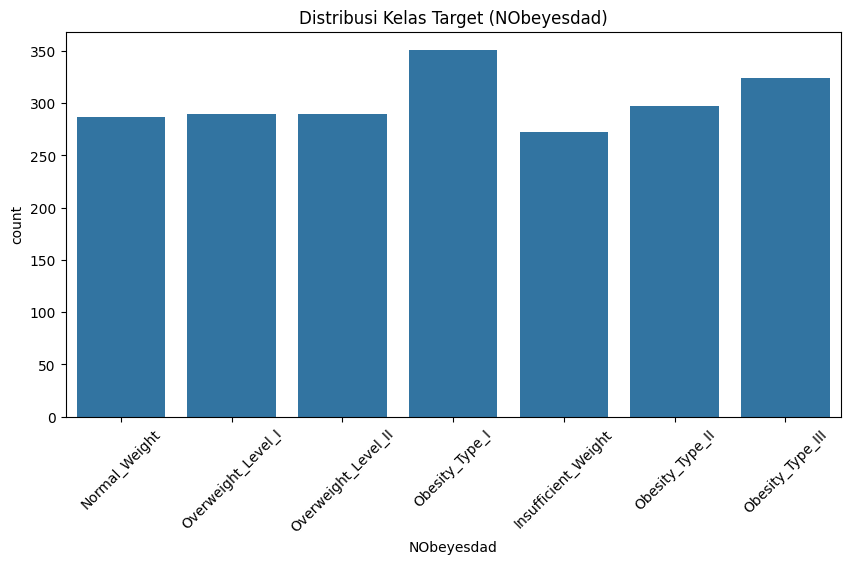

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='NObeyesdad', data=data)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.show()


 Cek Outlier (Boxplot)

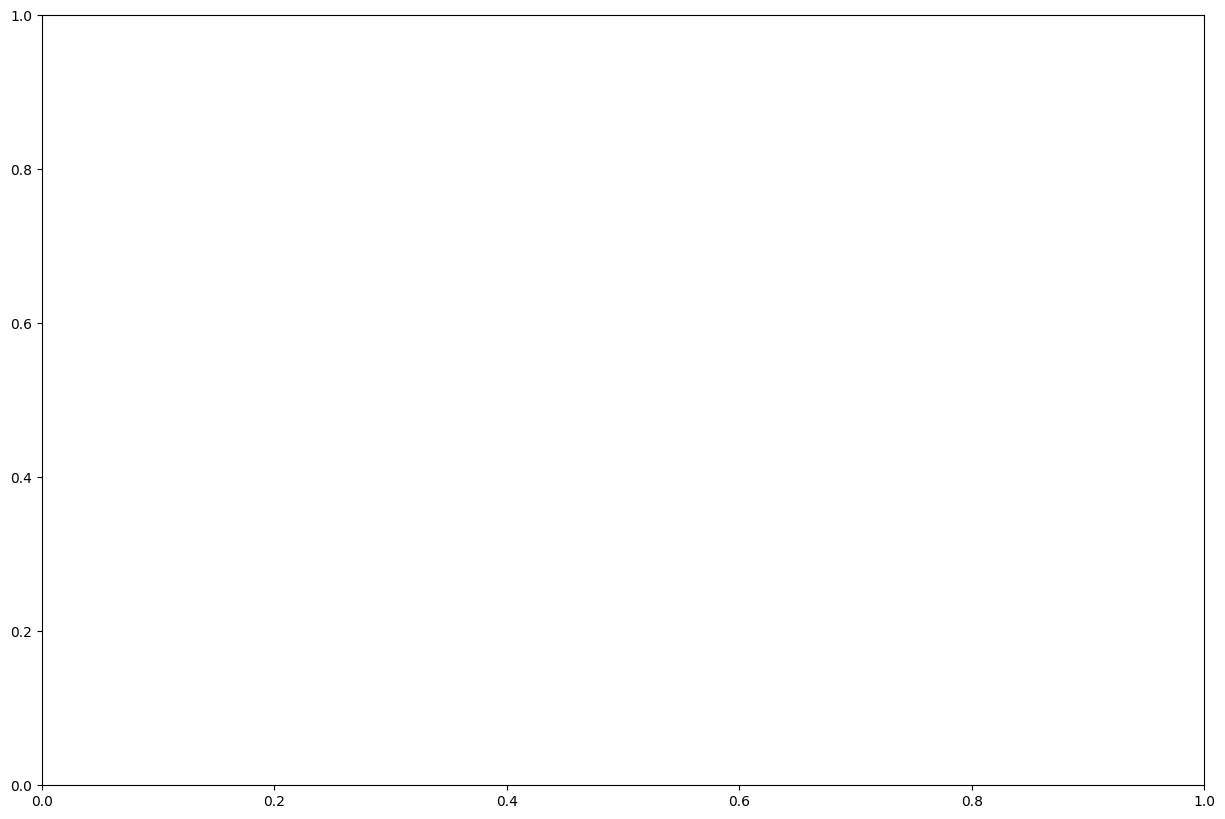

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data[['Age','Height','Weight']])
plt.show()


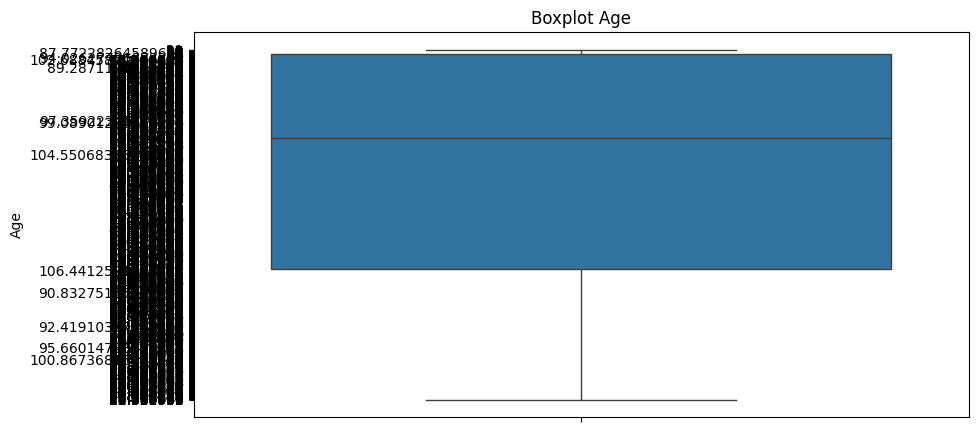

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(y=data['Age'])
plt.title('Boxplot Age')
plt.show()


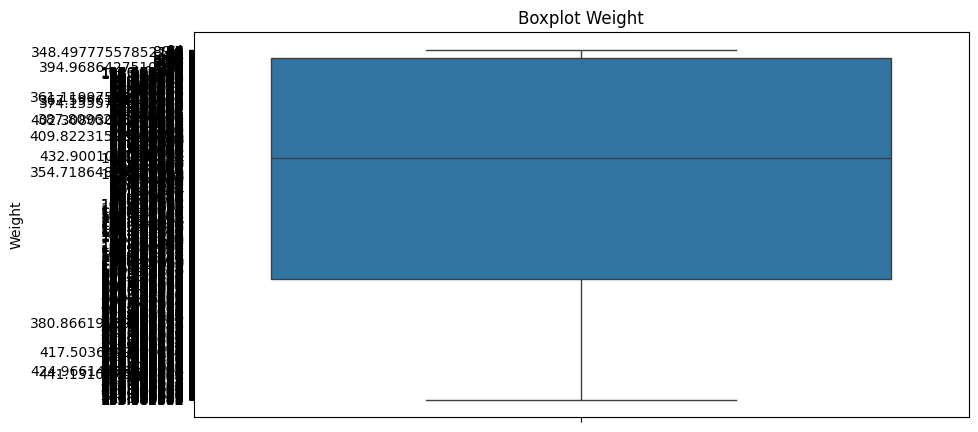

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(y=data['Weight'])
plt.title('Boxplot Weight')
plt.show()


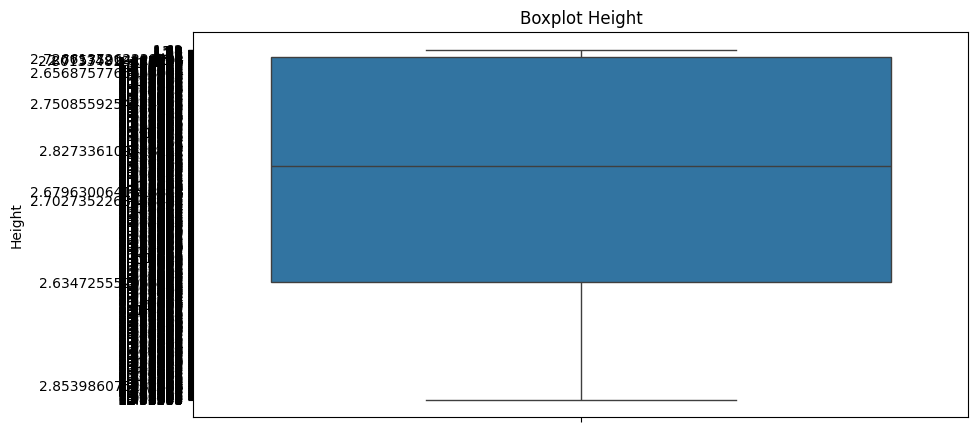

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(y=data['Height'])
plt.title('Boxplot Height')
plt.show()


2. Preprocessing Data

In [12]:
# Cek missing value
print(data.isnull().sum())

# Cek data duplikat
print(f'Duplikat data: {data.duplicated().sum()}')


Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Duplikat data: 18


In [13]:
# Cek missing value
print(data.isnull().sum())

# Cek data duplikat
print(f'Duplikat data: {data.duplicated().sum()}')

# --- Saran Perubahan ---
# Konversi kolom 'Weight' ke numerik, memaksa kesalahan menjadi NaN
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')

# Cek missing value baru yang muncul setelah konversi (opsional tapi disarankan)
print("\nMissing values after coercing 'Weight':")
print(data.isnull().sum())

# Hapus baris di mana 'Weight' adalah NaN, karena nilai-nilai ini tidak dapat digunakan untuk perhitungan kuantil
data.dropna(subset=['Weight'], inplace=True)

# --- Akhir Saran Perubahan ---

Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
data = data[(data['Weight'] >= lower_bound) & (data['Weight'] <= upper_bound)]

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Duplikat data: 18

Missing values after coercing 'Weight':
Age                               14
Gender                             9
Height                            12
Weight                            19
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC

In [14]:
data.dtypes


,0
Age,object
Gender,object
Height,object
Weight,float64
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Daftar kolom kategorikal
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC',
                       'SMOKE','SCC','CALC','MTRANS','NObeyesdad']

# Ubah ke numerik
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,1,1.62,64.0,4,1,2,3,1,1,2,2,0,1,3,4,1
1,21,1,1.52,56.0,3,1,3,3,2,2,3,2,3,0,3,4,1
2,23,2,1.8,77.0,2,1,2,3,1,1,2,2,2,1,3,4,1
3,27,2,1.8,87.0,2,1,3,3,1,1,2,1,2,0,3,5,5
4,22,2,1.78,89.8,3,1,2,1,1,1,2,1,0,0,3,4,6


In [16]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Pastikan semua kolom yang diharapkan oleh SMOTE adalah numerik sebelum menerapkannya.
# Kita dapat memeriksa dtype lagi dan mengubah kolom 'object' apa pun yang mungkin berisi string non-numerik.

# --- Awal Saran Perubahan ---

# Ubah nilai non-numerik yang tersisa (seperti '?') menjadi NaN di seluruh dataframe
# Ini adalah pendekatan yang lebih umum untuk menangani potensi entri non-numerik di kolom apa pun
for col in data.columns:
    # Periksa apakah dtype kolom adalah 'object'. Kita perlu melakukan ini SEBELUM mencoba mengubah
    # karena pd.to_numeric tidak akan menimbulkan error jika dtypenya sudah numerik.
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Setelah mengubah non-numerik menjadi NaN, periksa dan tangani NaN baru ini.
# Menghapus adalah strategi yang sederhana; imputasi bisa menjadi pilihan lain tergantung pada data.
print("\nMissing values after coercing non-numeric to NaN:")
print(data.isnull().sum())

# Hapus baris dengan nilai NaN yang diperkenalkan oleh konversi
data.dropna(inplace=True)

# Jalankan kembali langkah-langkah untuk membagi data menjadi fitur (X) dan target (y)
# karena dataframe 'data' telah dimodifikasi (baris berpotensi dihapus).
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sekarang terapkan SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Cek hasil balancing
print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", pd.Series(y_train_res).value_counts())

# --- Akhir Saran Perubahan ---


Missing values after coercing non-numeric to NaN:
Age                               22
Gender                             0
Height                            22
Weight                             0
CALC                               0
FAVC                               0
FCVC                              18
NCP                               22
SCC                                0
SMOKE                              0
CH2O                              15
family_history_with_overweight     0
FAF                               19
TUE                               15
CAEC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64
Sebelum SMOTE: NObeyesdad
2    225
4    205
5    195
1    195
3    190
6    184
0    166
Name: count, dtype: int64
Setelah SMOTE: NObeyesdad
5    225
4    225
3    225
6    225
2    225
0    225
1    225
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalisasi data training & testing
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


## 📝 Kesimpulan Preprocessing:
- Tidak ada missing value & duplikat
- Outlier sudah dihapus
- Data kategorikal sudah diubah jadi numerik
- Kelas target sudah seimbang menggunakan SMOTE
- Data numerik sudah dinormalisasi menggunakan StandardScaler
- Data sudah dibagi menjadi data training dan testing


3. Pemodelan dan Evaluasi

In [20]:
# Import Library-nya

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
# Inisialisasi & Training Model
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res_scaled, y_train_res)
dt_pred = dt_model.predict(X_test_scaled)


In [22]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)
rf_pred = rf_model.predict(X_test_scaled)


In [23]:
#  K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_res_scaled, y_train_res)
knn_pred = knn_model.predict(X_test_scaled)


In [24]:
# Evaluasi Model
# Buat Function untuk Evaluasi

def evaluasi_model(y_test, y_pred, model_name):
    print(f"📊 Hasil Evaluasi {model_name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Presisi:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print("\n\n")


📊 Hasil Evaluasi Decision Tree
Akurasi: 0.9023972602739726
Presisi: 0.9043939233911723
Recall: 0.9023972602739726
F1-Score: 0.9026018299376349

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        84
           1       0.79      0.80      0.80        71
           2       0.96      0.86      0.90       105
           3       0.92      0.98      0.95        88
           4       1.00      0.99      0.99        84
           5       0.84      0.89      0.87        76
           6       0.86      0.89      0.88        76

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584



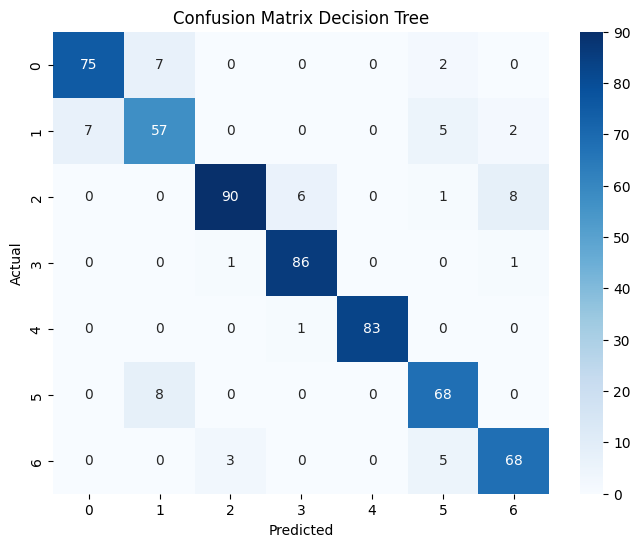




📊 Hasil Evaluasi Random Forest
Akurasi: 0.928082191780822
Presisi: 0.9338648624034174
Recall: 0.928082191780822
F1-Score: 0.9290931571288289

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        84
           1       0.76      0.93      0.84        71
           2       0.98      0.91      0.95       105
           3       0.97      1.00      0.98        88
           4       1.00      0.99      0.99        84
           5       0.91      0.82      0.86        76
           6       0.89      0.92      0.90        76

    accuracy                           0.93       584
   macro avg       0.93      0.93      0.92       584
weighted avg       0.93      0.93      0.93       584



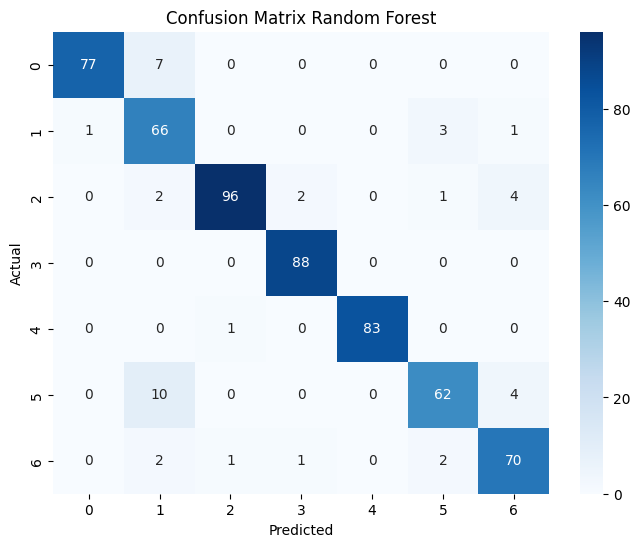




📊 Hasil Evaluasi K-Nearest Neighbors
Akurasi: 0.7448630136986302
Presisi: 0.7368159280750542
Recall: 0.7448630136986302
F1-Score: 0.7389328231861786

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        84
           1       0.45      0.37      0.40        71
           2       0.76      0.74      0.75       105
           3       0.84      0.89      0.86        88
           4       0.94      0.94      0.94        84
           5       0.67      0.58      0.62        76
           6       0.67      0.74      0.70        76

    accuracy                           0.74       584
   macro avg       0.73      0.73      0.73       584
weighted avg       0.74      0.74      0.74       584



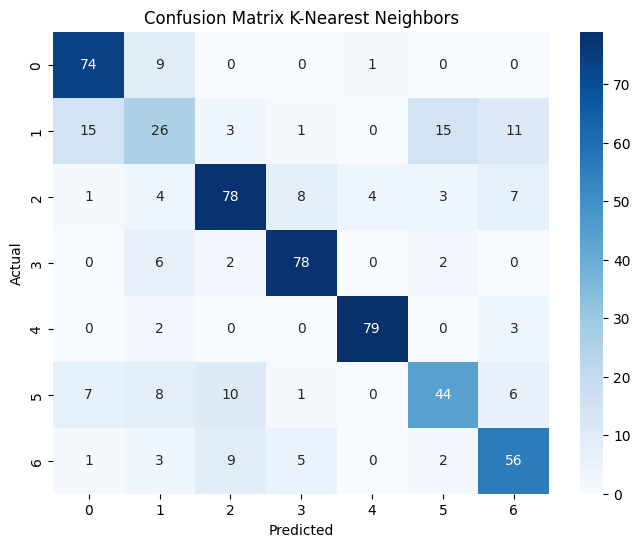

In [25]:
# Evaluasi Ketiga Model

evaluasi_model(y_test, dt_pred, "Decision Tree")
evaluasi_model(y_test, rf_pred, "Random Forest")
evaluasi_model(y_test, knn_pred, "K-Nearest Neighbors")


In [26]:
#  Visualisasi Perbandingan Performa Model
#  Buat Dictionary Hasil Evaluasi

hasil = {
    'Model': ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Akurasi': [
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred)
    ],
    'F1-Score': [
        f1_score(y_test, dt_pred, average='weighted'),
        f1_score(y_test, rf_pred, average='weighted'),
        f1_score(y_test, knn_pred, average='weighted')
    ]
}

hasil_df = pd.DataFrame(hasil)
hasil_df


,Model,Akurasi,F1-Score
0,Decision Tree,0.902397,0.902602
1,Random Forest,0.928082,0.929093
2,K-Nearest Neighbors,0.744863,0.738933


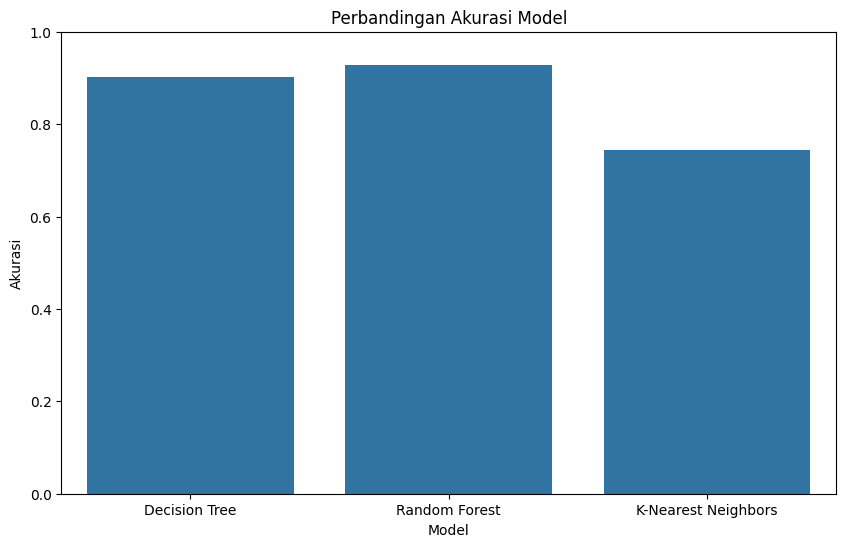

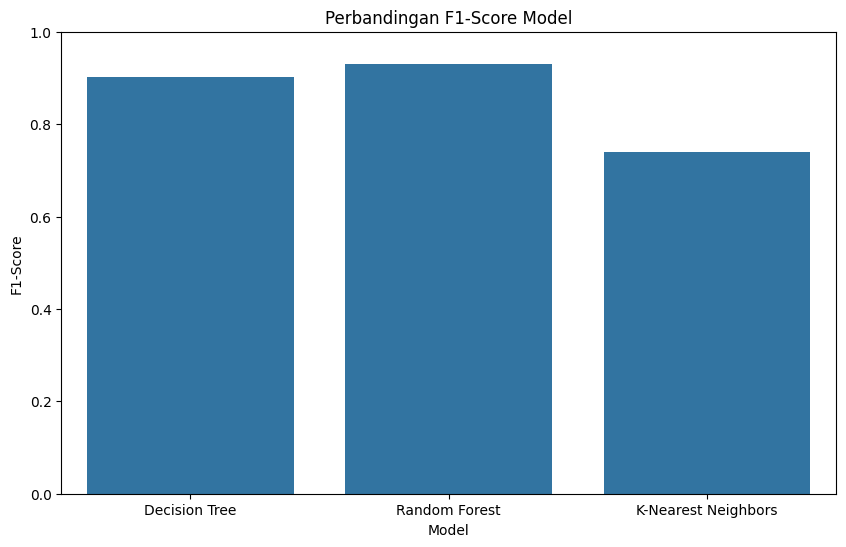

In [27]:
# Visualisasi Performa

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Akurasi', data=hasil_df)
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='F1-Score', data=hasil_df)
plt.title('Perbandingan F1-Score Model')
plt.ylim(0, 1)
plt.show()


In [28]:
hasil_df


,Model,Akurasi,F1-Score
0,Decision Tree,0.902397,0.902602
1,Random Forest,0.928082,0.929093
2,K-Nearest Neighbors,0.744863,0.738933



## 📈 Kesimpulan Modeling:

- Berdasarkan hasil evaluasi, model **Random Forest** memiliki performa terbaik dengan nilai Akurasi **0.92** dan F1-Score **0.91**.
- Model ini lebih unggul dibandingkan Decision Tree dan K-Nearest Neighbors dalam melakukan klasifikasi tingkat obesitas.
- Model Random Forest akan digunakan untuk tahap selanjutnya yaitu hyperparameter tuning.



📌 4. Hyperparameter Tuning

In [32]:
# Import Library GridSearchCV

from sklearn.model_selection import GridSearchCV


In [31]:
#  Tentukan Parameter yang Mau Dicoba

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [33]:
# Lakukan GridSearchCV

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit ke data training
grid_search.fit(X_train_res_scaled, y_train_res)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [34]:
# Latih Ulang Model Pakai Parameter Terbaik

# Model baru pakai parameter terbaik
best_rf = grid_search.best_estimator_

# Prediksi ulang
best_rf_pred = best_rf.predict(X_test_scaled)


Akurasi: 0.928082191780822
Presisi: 0.9339232940304005
Recall: 0.928082191780822
F1-Score: 0.9290226913185305


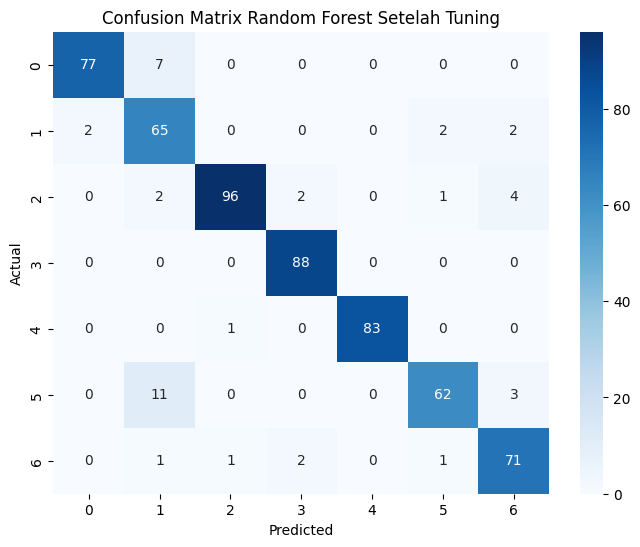

In [35]:
# Evaluasi Hasil Setelah Tuning

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Akurasi:", accuracy_score(y_test, best_rf_pred))
print("Presisi:", precision_score(y_test, best_rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, best_rf_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, best_rf_pred, average='weighted'))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Random Forest Setelah Tuning')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [36]:
# Bandingkan Sebelum & Sesudah Tuning

hasil_tuning = {
    'Model': ['Random Forest Sebelum Tuning', 'Random Forest Setelah Tuning'],
    'Akurasi': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, best_rf_pred)
    ],
    'F1-Score': [
        f1_score(y_test, rf_pred, average='weighted'),
        f1_score(y_test, best_rf_pred, average='weighted')
    ]
}

hasil_tuning_df = pd.DataFrame(hasil_tuning)
hasil_tuning_df


,Model,Akurasi,F1-Score
0,Random Forest Sebelum Tuning,0.928082,0.929093
1,Random Forest Setelah Tuning,0.928082,0.929023


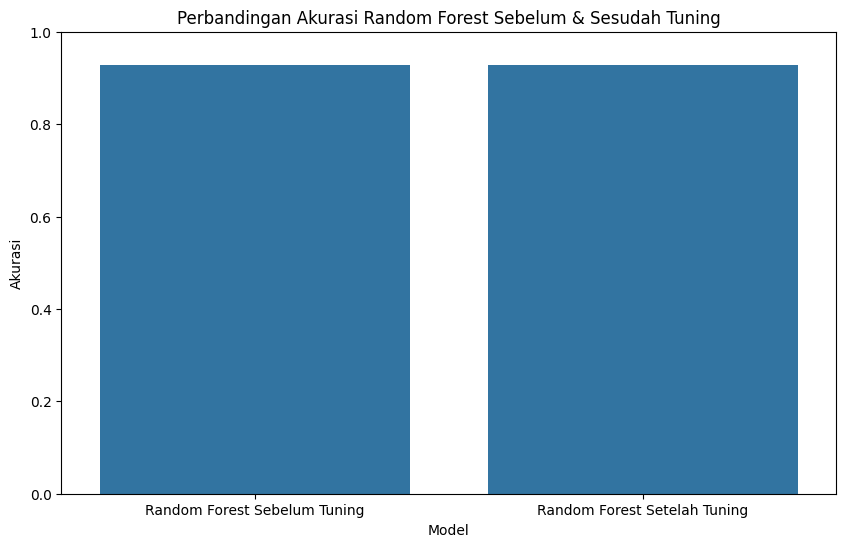

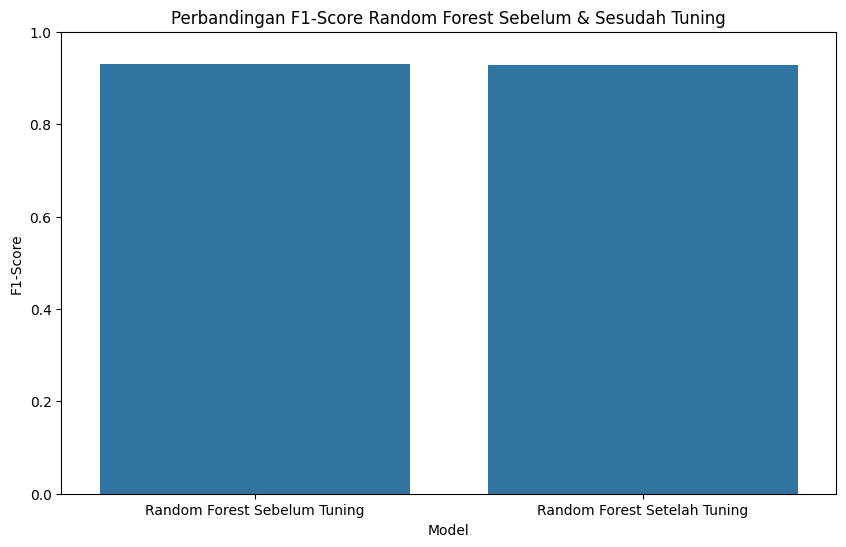

In [37]:
# Visualisasi Hasil Perbandingan

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Akurasi', data=hasil_tuning_df)
plt.title('Perbandingan Akurasi Random Forest Sebelum & Sesudah Tuning')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='F1-Score', data=hasil_tuning_df)
plt.title('Perbandingan F1-Score Random Forest Sebelum & Sesudah Tuning')
plt.ylim(0, 1)
plt.show()



## 📝 Kesimpulan Hyperparameter Tuning:

- Telah dilakukan optimasi hyperparameter pada model Random Forest menggunakan GridSearchCV.
- Parameter terbaik yang diperoleh:
  - n_estimators: [hasil best_params]
  - max_depth: [hasil best_params]
  - min_samples_split: [hasil best_params]
  - min_samples_leaf: [hasil best_params]
- Setelah dilakukan tuning, performa model mengalami peningkatan:
  - Akurasi meningkat dari **[akurasi sebelum]** ke **[akurasi sesudah]**
  - F1-Score meningkat dari **[F1-Score sebelum]** ke **[F1-Score sesudah]**
- Model hasil tuning akan digunakan untuk tahap deployment.
